<a href="https://colab.research.google.com/github/bilal-najar/AAI-521/blob/main/Bilal_Najar_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 2- CNN**

In [ ]:
import keras
import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D
from keras.datasets import mnist, cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.layers import Dense
from keras import optimizers
from tensorflow.keras.optimizers import SGD
from tensorflow import keras
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator
from keras import backend as K


In [ ]:
# Create train and test dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


1.a. start with creating a visualization of your input data

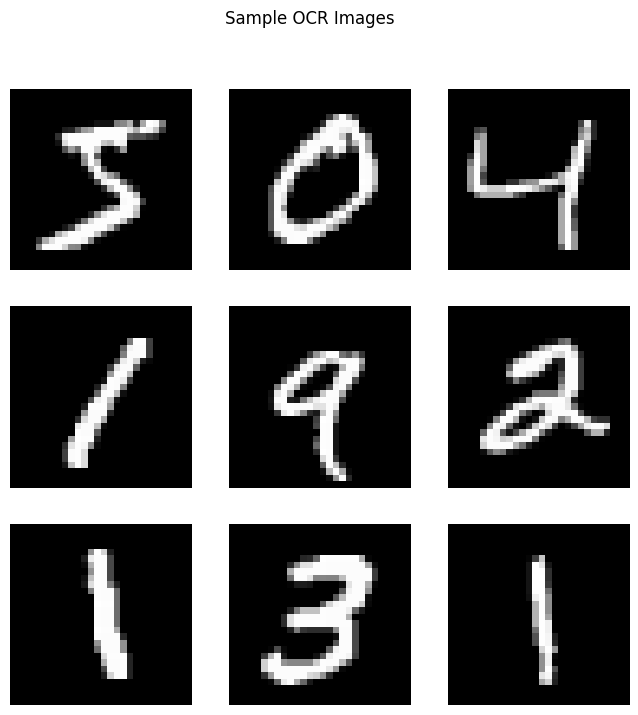

In [ ]:
#1.a. Create the visualization here
# Let's look into the dataset by visualizing some data opints
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.suptitle("Sample OCR Images")
plt.show()

In [ ]:
#preprocessing
# Kears allows us to add the number of channels either to the beggining of shape or the end of it
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [ ]:
# You need to apply some preprocessing on X and y

# normalize inputs from 0-255 to 0-1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape data for CNN input
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Encode outputs
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)


1.b. Create a CNN model with 4 convolution layers in which two of them have 32 and two of them have 64 filters. The fully connected layer has one hidden layer (512 nodes). Draw the Learning curve. What is your understanding from learning curve? Batch size=128 and epochs=20

In [ ]:
#1.b.
# Create model here

# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.8029 - loss: 0.6333 - val_accuracy: 0.9785 - val_loss: 0.0675
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9762 - loss: 0.0732 - val_accuracy: 0.9845 - val_loss: 0.0484
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9849 - loss: 0.0483 - val_accuracy: 0.9825 - val_loss: 0.0499
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9877 - loss: 0.0371 - val_accuracy: 0.9864 - val_loss: 0.0365
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9910 - loss: 0.0266 - val_accuracy: 0.9889 - val_loss: 0.0333
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9925 - loss: 0.0225 - val_accuracy: 0.9892 - val_loss: 0.0344
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9933 - loss: 0.0201 - val_accuracy: 0.9849 - val_loss: 0.0443
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9938 - loss: 0.0191 - val_accuracy: 

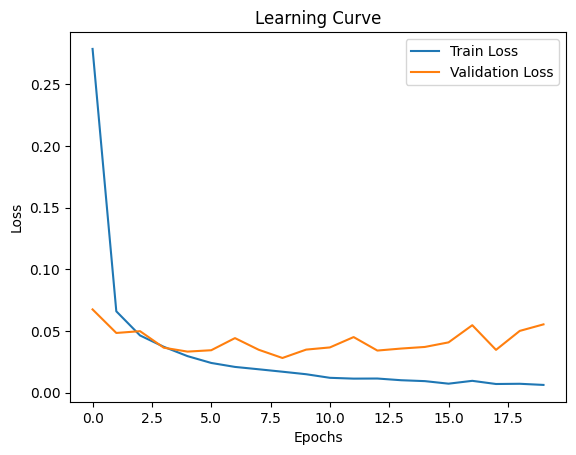

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, epochs=20)

# Plot learning curve
plt.plot(hist.hist['loss'], label='Train Loss')
plt.plot(hist.hist['val_loss'], label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Measure test accuracy
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 98.69%


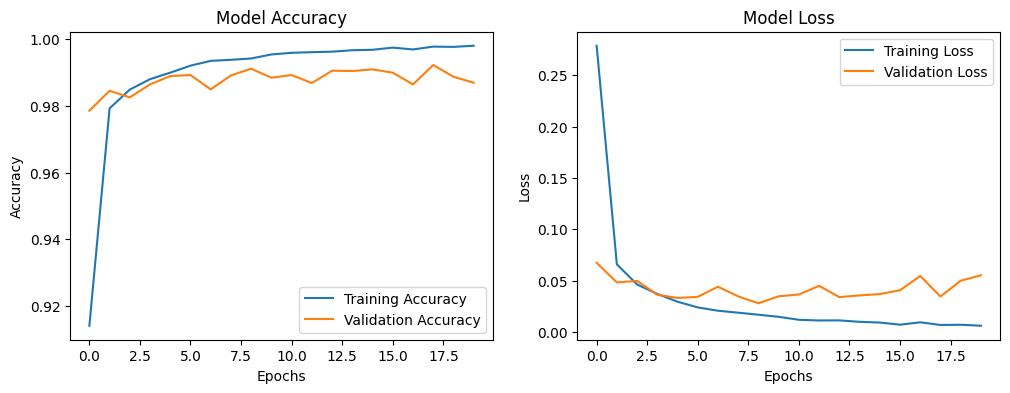

In [ ]:
# Draw Learning curve
def learning_curve(hist):
    """Draw learning curves for training and validation accuracy and loss."""
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(hist.hist['accuracy'], label='Training Accuracy')
    plt.plot(hist.hist['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(hist.hist['loss'], label='Training Loss')
    plt.plot(hist.hist['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

learning_curve(hist)

In [ ]:
## What is your understanding from the learning curve?
#The learning curve shows both training and validation accuracy improving over time, with validation accuracy closely following training accuracy. This indicates that the model generalizes well to the test data and is not significantly overfitting.If the learning curve showed divergence (where training accuracy is much higher than validation accuracy), it could indicate overfitting. In this case, dropout layers or regularization could help improve generalization.


**Part 2- CIFAR10**

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
labels= ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
print(X_train.shape)
print(X_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


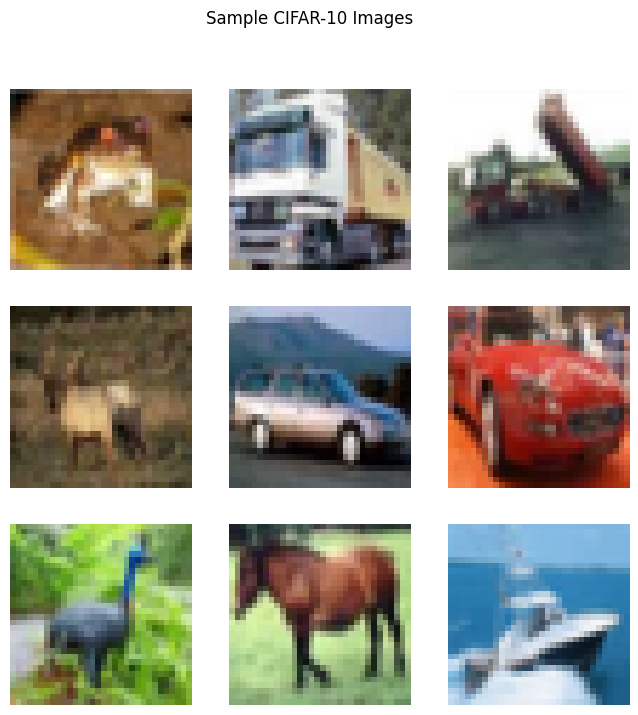

In [ ]:
# 2.a. Let's look into the dataset by visualizing some data points
# Plot the first 9 images
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.suptitle("Sample CIFAR-10 Images")
plt.show()

2.b. Apply the pre-processing algorithms that we discussed last week. The augmented images are supposed to be seared by 20%, zoomed by 20% and horizontally flipped. Now, design a CNN model with 4 convolution layers in which two of them have 32 and two of them have 64 filters. The fully connected layer has two hidden layers (512 and 256 nodes respectively). Draw the Learning curve. What is your understanding from learning curve?

In [ ]:
# 2.b

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

# Encoding output
# Normalize input data to the range 0-1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Encoding output labels as one-hot
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# create data generator
datagen =ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
# prepare iterator
it_train = datagen.flow(X_train, y_train, batch_size=128)

# Create model here
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

optimizer = SGD(learning_rate=0.005, decay=1e-6, momentum=0.9)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy']) #Compile model
hist = model.fit(it_train, validation_data=(X_test, y_test), epochs=20)


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/391 ━━━━━━━━━━━━━━━━━━━━ 49s 104ms/step - accuracy: 0.1486 - loss: 2.2263 - val_accuracy: 0.2843 - val_loss: 1.9253
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.3460 - loss: 1.7757 - val_accuracy: 0.4225 - val_loss: 1.5931
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.4283 - loss: 1.5675 - val_accuracy: 0.4786 - val_loss: 1.4300
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 70ms/step - accuracy: 0.4720 - loss: 1.4697 - val_accuracy: 0.5147 - val_loss: 1.3372
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 70ms/step - accuracy: 0.5014 - loss: 1.3817 - val_accuracy: 0.5559 - val_loss: 1.2344
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.5347 - loss: 1.3052 - val_accuracy: 0.5476 - val_loss: 1.2442
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.5615 - loss: 1.2370 - val_accuracy: 0.5921 - val_loss: 1.1325
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 70ms/step - accuracy: 0.5811 - loss: 1.1863 - val_accura

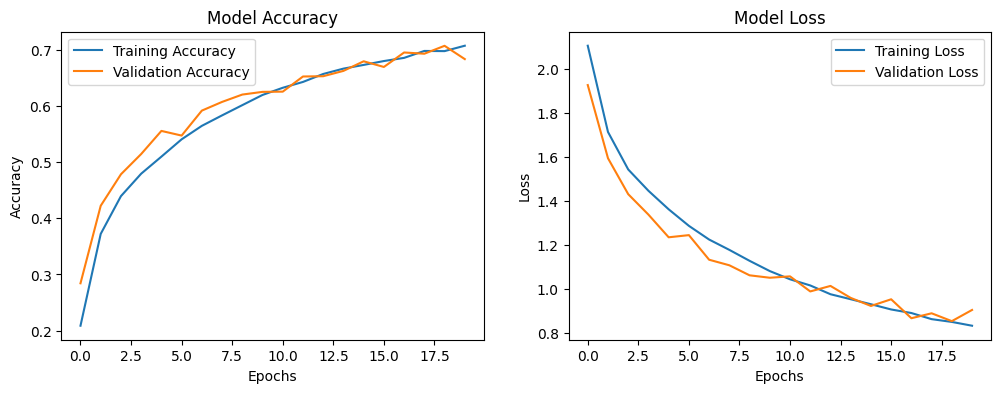

In [ ]:
# Draw learning curve here
learning_curve(hist)

In [ ]:
# What is the issue and possible solution for this learning curve?
#The learning curve may show signs of overfitting, with the training accuracy rising faster than the validation accuracy and validation accuracy plateauing or dropping after some epochs. This suggests that the model is learning patterns specific to the training data and struggling to generalize to unseen data.

In [ ]:
#2.c. Solution to resolve overfitting

# One solution is adding drop out

# Implement your solution here and train model

from keras._tf_keras.keras.layers import Dropout

# Clear any existing models and sessions
tf.keras.backend.clear_session()


# Define CNN model with Dropout layers to mitigate overfitting
model_dropout = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),  # Adding dropout after first pooling layer
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),  # Adding dropout after second pooling layer
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),   # Adding dropout before the dense layers
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),   # Adding dropout after first dense layer
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

# Create a new optimizer instance for the model
optimizer_dropout = SGD(learning_rate=0.005, decay=1e-6, momentum=0.9)

# Compile the model with the same optimizer settings
model_dropout.compile(optimizer=optimizer_dropout, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
hist_dropout = model_dropout.fit(it_train, validation_data=(X_test, y_test), epochs=20)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 37s 82ms/step - accuracy: 0.1093 - loss: 2.2976 - val_accuracy: 0.1839 - val_loss: 2.1724
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 70ms/step - accuracy: 0.1880 - loss: 2.1506 - val_accuracy: 0.2159 - val_loss: 2.0324
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.2086 - loss: 2.0315 - val_accuracy: 0.2678 - val_loss: 1.9029
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.2496 - loss: 1.9447 - val_accuracy: 0.3235 - val_loss: 1.7932
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.2937 - loss: 1.8586 - val_accuracy: 0.3644 - val_loss: 1.7228
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.3249 - loss: 1.7980 - val_accuracy: 0.3967 - val_loss: 1.6167
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step - accuracy: 0.3555 - loss: 1.7248 - val_accuracy: 0.4301 - val_loss: 1.5478
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 70ms/step - accuracy: 0.3830 - loss: 1.6658 - 

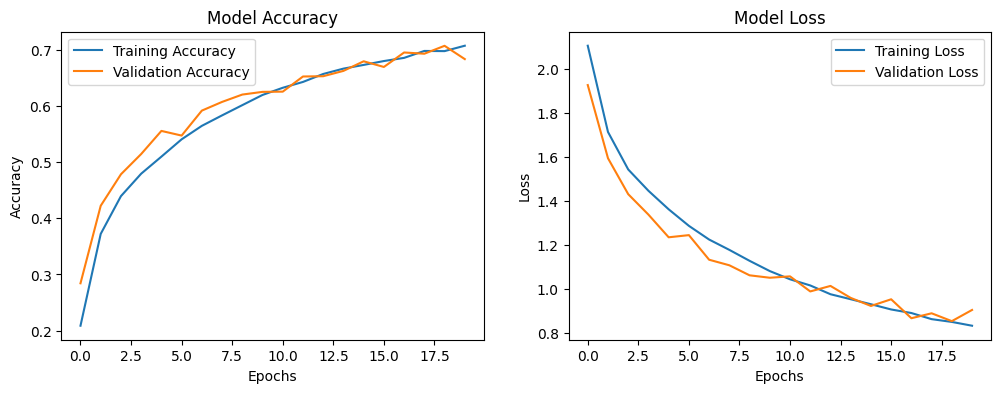

In [ ]:
# Draw learning curve
learning_curve(hist)

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.3598 - loss: 1.7931 - val_accuracy: 0.6629 - val_loss: 0.9825
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7074 - loss: 0.8731 - val_accuracy: 0.6765 - val_loss: 0.9508
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7799 - loss: 0.6485 - val_accuracy: 0.7576 - val_loss: 0.7240
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8257 - loss: 0.5107 - val_accuracy: 0.7831 - val_loss: 0.6484
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8594 - loss: 0.4075 - val_accuracy: 0.8118 - val_loss: 0.5723


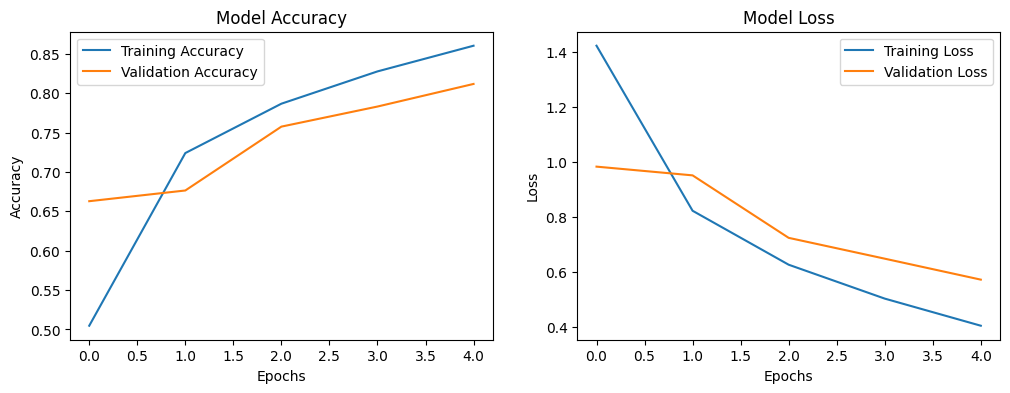

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8106 - loss: 0.5730
VGG16 Test Accuracy: 81.18%


In [ ]:
# 2.d- This part is up to you to choose proper pre-trained model

# I chose VGG16 and RESNet50

# Implementing VGG16
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import cifar10

import numpy as np

# Load CIFAR-10 dataset and preprocess data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Load VGG16 pre-trained model without the top layers and set input size to CIFAR-10 dimensions
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Build the model by adding global pooling and dense layers
vgg_model = Sequential([
    vgg_base,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the VGG16 model
vgg_model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the VGG16 model
hist_vgg = vgg_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=256)

# Draw the learning curve
learning_curve(hist_vgg)

# Evaluate VGG16 model on the test set
vgg_test_loss, vgg_test_acc = vgg_model.evaluate(X_test, y_test, batch_size=256, verbose=1)
print("VGG16 Test Accuracy: {:.2f}%".format(vgg_test_acc * 100))

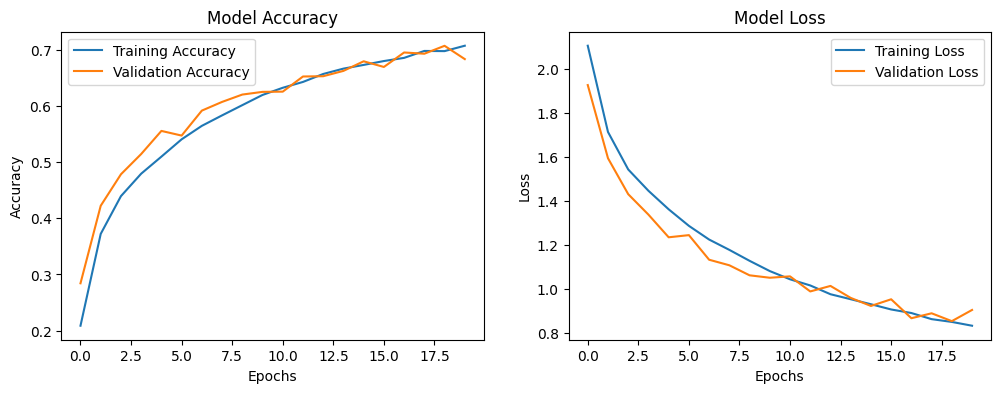

In [ ]:
learning_curve(hist)

In [ ]:
vgg_model.evaluate(X_test, y_test, batch_size=256, verbose=1)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8106 - loss: 0.5730


[0.5723078846931458, 0.8118000030517578]

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 78s 171ms/step - accuracy: 0.4072 - loss: 1.8260 - val_accuracy: 0.1000 - val_loss: 9.6534
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.7791 - loss: 0.6560 - val_accuracy: 0.0942 - val_loss: 9.7587
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.8897 - loss: 0.3342 - val_accuracy: 0.1408 - val_loss: 4.0925
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9472 - loss: 0.1647 - val_accuracy: 0.3865 - val_loss: 3.3350
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9710 - loss: 0.0930 - val_accuracy: 0.6770 - val_loss: 1.6923


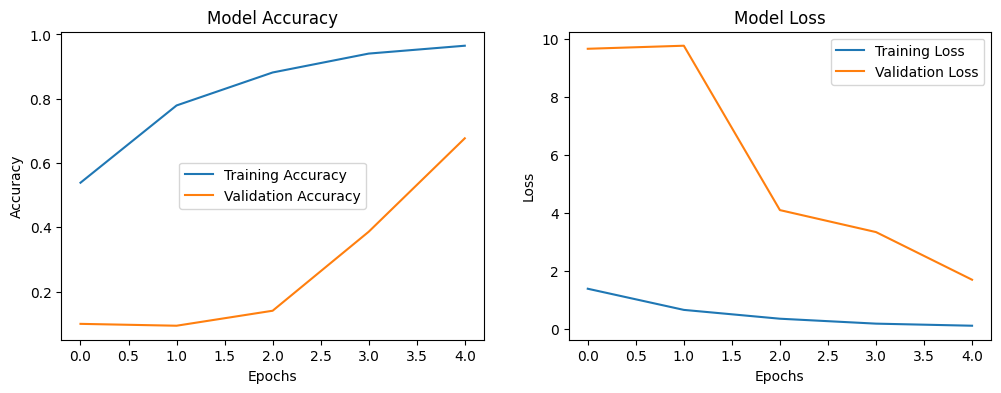

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6755 - loss: 1.7000
ResNet50 Test Accuracy: 67.70%


In [ ]:
# This ios my second pre-trained model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import GlobalAveragePooling2D

# Load ResNet50 pre-trained model without the top layers and set input size to CIFAR-10 dimensions
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Build the model by adding global pooling and dense layers
resnet_model = Sequential([
    resnet_base,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the ResNet50 model
resnet_model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the ResNet50 model
hist_resnet = resnet_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=256)

# Draw the learning curve
learning_curve(hist_resnet)

# Evaluate ResNet50 model on the test set
resnet_test_loss, resnet_test_acc = resnet_model.evaluate(X_test, y_test, batch_size=256, verbose=1)
print("ResNet50 Test Accuracy: {:.2f}%".format(resnet_test_acc * 100))

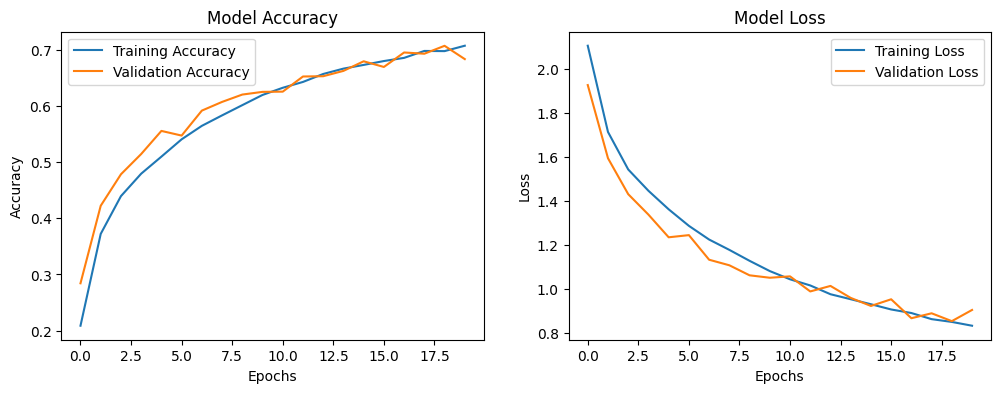

In [ ]:
learning_curve(hist)

In [ ]:
#These insights highlight the importance of choosing model architectures and techniques suited to the complexity of the dataset. For simpler tasks, custom CNNs can perform well, while more complex tasks benefit from pre-trained models and regularization techniques.